In [167]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

In [168]:
np.random.seed(0)

In [169]:
(X_train, y_train),(X_test,y_test) = mnist.load_data()

In [170]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


In [171]:
assert(X_train.shape[0] == y_train.shape[0]),"The number of images is not equal to the number of labels"
assert(X_test.shape[0] == y_test.shape[0]),"The number of images is not equal to the number of labels"
assert(X_train.shape[1:] == (28,28)),"The dimentions of the images are not 28X28"
assert(X_test.shape[1:] == (28,28)),"The dimentions of the images are not 28X28"


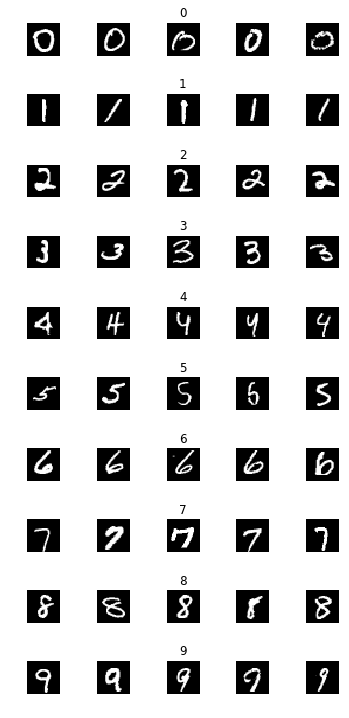

In [172]:
num_of_samples = []
cols = 5
num_classes = 10

fig,axs = plt.subplots(nrows=num_classes,ncols=cols,figsize=(5,10))
fig.tight_layout()
for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0,len(x_selected - 1)),:  :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        if i==2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0,0.5,'Number of images')

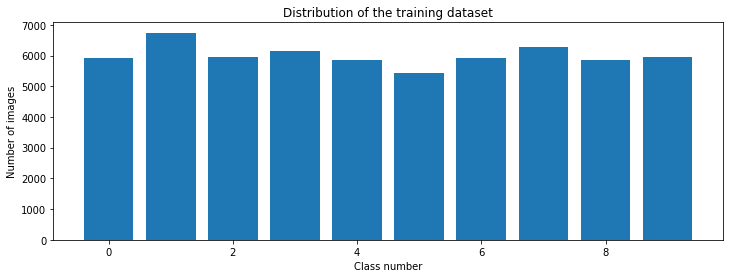

In [173]:
print(num_of_samples)
plt.figure(figsize=(12,4))
plt.bar(range(0,num_classes),num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [174]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [175]:
X_train = X_train/255
X_test = X_test/255


In [176]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0],num_pixels)
X_test = X_test.reshape(X_test.shape[0],num_pixels)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [177]:
def create_model():
    model = Sequential()
    model.add(Dense(30,input_dim=num_pixels,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])
    return model


In [178]:
model = create_model()
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 30)                23550     
_________________________________________________________________
dense_29 (Dense)             (None, 10)                310       
_________________________________________________________________
dense_30 (Dense)             (None, 10)                110       
Total params: 23,970
Trainable params: 23,970
Non-trainable params: 0
_________________________________________________________________
None


In [179]:
history = model.fit(X_train, y_train, validation_split=0.1,epochs=10,batch_size=200,verbose=1,shuffle=1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 2s 28us/step - loss: 0.4070 - acc: 0.8807 - val_loss: 0.1997 - val_acc: 0.9413
Epoch 2/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.1994 - acc: 0.9424 - val_loss: 0.1564 - val_acc: 0.9567
Epoch 3/10
54000/54000 [==============================] - 1s 20us/step - loss: 0.1662 - acc: 0.9514 - val_loss: 0.1605 - val_acc: 0.9583
Epoch 4/10
54000/54000 [==============================] - 1s 19us/step - loss: 0.1407 - acc: 0.9582 - val_loss: 0.1406 - val_acc: 0.9632
Epoch 5/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.1263 - acc: 0.9616 - val_loss: 0.1432 - val_acc: 0.9627
Epoch 6/10
54000/54000 [==============================] - 1s 22us/step - loss: 0.1181 - acc: 0.9642 - val_loss: 0.1536 - val_acc: 0.9580
Epoch 7/10
54000/54000 [==============================] - 1s 21us/step - loss: 0.1080 - acc: 0.9662 - val_loss: 0.1446 - val_acc:

Text(0.5,0,'epoch')

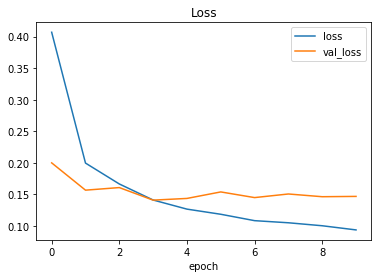

In [180]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5,0,'epoch')

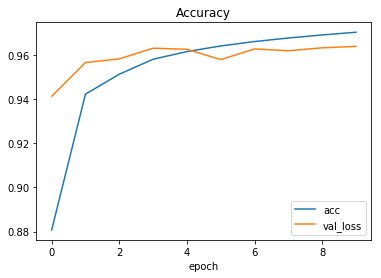

In [181]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc','val_loss'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [182]:
score = model.evaluate(X_test,y_test,verbose=0)
print(type(score))
print('Test score:',score[0])
print('Test accuracy:',score[1])

<class 'list'>
Test score: 0.1472948694226332
Test accuracy: 0.9599


<Response [200]>


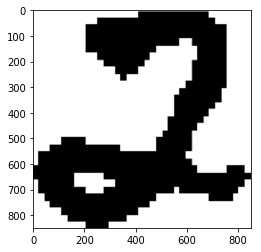

In [183]:
import requests
from PIL import Image
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream=True)
print(response)
img = Image.open(response.raw)
plt.imshow(img)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0 118 255 255 255 255
  255 255 255 255 222   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255   2   0   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 255 255
  255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0 255 255 255 255 255 255 255 255 255 254 254
  254   0 236 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0  33 255 255 255 255 255 255 255  33   0   0
    0   0   0 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0  21 255 255 255 255 255  21   0   0   0
    0   0 215 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  63 255 255 137   0   0   0   0
    0   0 235 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 255   0   0   0   

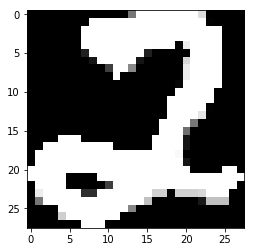

In [184]:
import cv2

img_array = np.asarray(img)
resized = cv2.resize(img_array,(28,28))
gray_scale = cv2.cvtColor(resized,cv2.COLOR_BGR2GRAY)
image = cv2.bitwise_not(gray_scale)
plt.imshow(image,cmap=plt.get_cmap("gray"))
print(image)

In [185]:
image=image/255
image = image.reshape(1,784)

In [186]:
prediction = model.predict_classes(image)
print("predicted digit:",str(prediction))

predicted digit: [2]
